In [310]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import nltk.corpus
#nltk.download('stopwords')
import re
from sklearn import svm
from nltk.corpus import stopwords

data = pd.read_csv('./animes.csv', index_col = 0)

#Obtaining all parameters of the original dataframe
print("\n\nOriginal dataset size:",data.shape)
print("\nInitial columns of data:\n",data.columns)


#checking the data
#print total number of rows with 0
print("\n\nThe following columns have __ total zeros")
for col in data:
    for num in col:
        total_zeros = 0
        if(num == 0.0 or 0.00 or 0.000 or 0.0000):
            total_zeros += 1
    print(col, total_zeros)

#print total number of rows with nans
print("\n\nThe following columns have ___ total NaN's")
print (data.isna().sum())





Original dataset size: (19311, 11)

Initial columns of data:
 Index(['title', 'synopsis', 'genre', 'aired', 'episodes', 'members',
       'popularity', 'ranked', 'score', 'img_url', 'link'],
      dtype='object')


The following columns have __ total zeros
title 0
synopsis 0
genre 0
aired 0
episodes 0
members 0
popularity 0
ranked 0
score 0
img_url 0
link 0


The following columns have ___ total NaN's
title            0
synopsis       975
genre            0
aired            0
episodes       706
members          0
popularity       0
ranked        3212
score          579
img_url        180
link             0
dtype: int64




Dropped the following columns: 'episodes','aired','img_url','link','popularity'

Remaining columns left in data:
 Index(['title', 'synopsis', 'genre', 'members', 'ranked', 'score'], dtype='object')


animeDataGenre:
Dataset size: (19229, 5)

Number of single genres: 41

List of single genres:
 {'dementia', 'drama', 'comedy', 'samurai', 'shounen', 'action', 'vampire', 'fantasy', 'super power', 'josei', 'game', 'school', 'shounen ai', 'parody', 'music', 'cars', 'thriller', 'space', 'yaoi', 'romance', 'seinen', 'shoujo', 'martial arts', 'supernatural', 'military', 'harem', 'psychological', 'kids', 'slice of life', 'magic', 'adventure', 'mecha', 'demons', 'sci-fi', 'historical', 'sports', 'police', 'ecchi', 'mystery', 'horror', 'hentai'}


<Figure size 720x720 with 0 Axes>

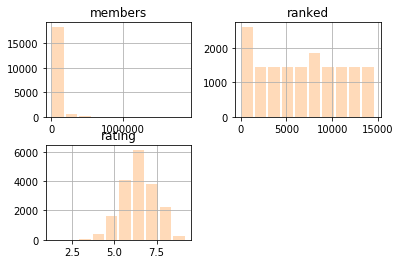

In [311]:

#Preprocessing Part 1

#renaming "score" column to "rating" column
data.rename(columns={"score":"rating"})

#Dropping columns in preparation for creating Dataframe animeDataGenre
data = data.drop(columns=["episodes","aired","img_url","link","popularity"])

#print out new columns
print("\n\nDropped the following columns: 'episodes','aired','img_url','link','popularity'")
print("\nRemaining columns left in data:\n",data.columns)

#Preprocessing Part 2

#Single Genre Categorization
#if a row does not have a genre, omit it, else retain first genre (row[2] = genre)
#Two lists: 
#d: holds all the columns of the row except for the first column (row[1] = user id)
#n: holds only the first genre (row[2] = genre)
d = [] #used to hold data for animeDataGenre
#n = [] #holds the list of all the single genres for anime that have at least one genre
for row in data.values:
    if(row[2] == "[]"):continue
    row[2] = row[2].split(',')[0].lower()
    row[2] = re.sub(r"[\[\]\'\']", "", row[2])
    d.insert(0, list(row[1:]))
  #  n.insert(0,row[2])

#Preprocessing Part 3

#Create dataframe animeDataGenre from list d
animeDataGenre = pd.DataFrame(data = d, columns=["synopsis", "genre","members","ranked","rating"])
animeDataGenre.rename(columns={"score":"rating"})
print("\n\nanimeDataGenre:\nDataset size:",animeDataGenre.shape)
plt.figure(figsize=(10,10))
animeDataGenre.hist(rwidth = 0.85, color = 'peachpuff');

#print dataframe after collecting the first genre from each anime and listing the genres
print("\nNumber of single genres:",len(set(animeDataGenre.genre)))
print("\nList of single genres:\n",set(animeDataGenre.genre))

#Preprocessing Part 4

singleCountsBeforeNan = collections.Counter(animeDataGenre.genre)  


<BarContainer object of 41 artists>

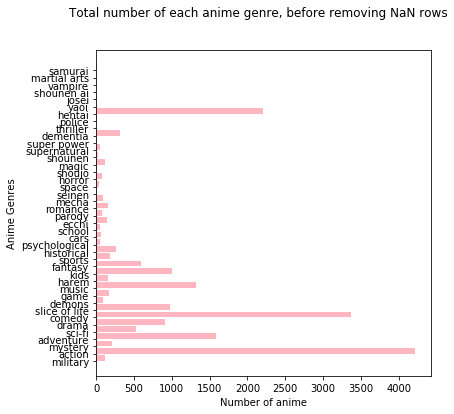

In [312]:
#turn list n into a numpy array
#np.asarray(n)
singleCountsBeforeNan = collections.Counter(animeDataGenre.genre)  
#want to see the scope of all the anime that only have one category
import collections
#singleCounts = collections.Counter(n)
plt.figure(figsize=(6,6)) 
plt.suptitle('Total number of each anime genre, before removing NaN rows',fontsize=12)
plt.xlabel('Number of anime')
plt.ylabel('Anime Genres')
plt.barh(range(len(singleCounts)), list(singleCounts.values()),tick_label=list(singleCounts.keys()),align='edge', color = 'lightpink')

In [313]:

#print total number of rows with nans in animeDataGenre
print("\n\nThe following columns in animeDataGenre have ___ total NaN's")
print (animeDataGenre.isna().sum())

#NaN rows dropped
animeDataGenre = animeDataGenre.dropna()

print("\nDropped all NaN's from animeDataGenre")
animeDataGenre["ranked"] = animeDataGenre["ranked"].astype('int')
print("\n\nanimeDataGenre:\nModified dataset size:",animeDataGenre.shape)




The following columns in animeDataGenre have ___ total NaN's
synopsis     942
genre          0
members        0
ranked      3204
rating       571
dtype: int64

Dropped all NaN's from animeDataGenre


animeDataGenre:
Modified dataset size: (15460, 5)


<BarContainer object of 38 artists>

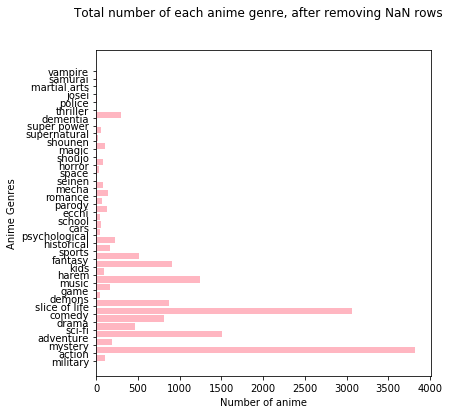

In [314]:
singleCountsAfterNan = collections.Counter(animeDataGenre.genre)  
plt.figure(figsize=(6,6)) 
plt.suptitle('Total number of each anime genre, after removing NaN rows',fontsize=12)
plt.xlabel('Number of anime')
plt.ylabel('Anime Genres')
plt.barh(range(len(singleCountsAfterNan)), list(singleCountsAfterNan.values()),tick_label=list(singleCountsAfterNan.keys()),align='edge', color = 'lightpink')

Index(['synopsis', 'genre', 'members', 'ranked', 'rating'], dtype='object')

Number of single genres: 38

List of single genres:
 {'dementia', 'drama', 'comedy', 'samurai', 'shounen', 'action', 'vampire', 'fantasy', 'super power', 'josei', 'game', 'school', 'parody', 'music', 'cars', 'thriller', 'space', 'romance', 'seinen', 'shoujo', 'martial arts', 'supernatural', 'military', 'harem', 'psychological', 'kids', 'slice of life', 'magic', 'adventure', 'mecha', 'demons', 'sci-fi', 'historical', 'sports', 'police', 'ecchi', 'mystery', 'horror'}

Finalized animeDataGenre:


,synopsis,genre,members,ranked,rating
0,The year is Universal Century 0093. Char Aznab...,military,29248,1081,7.73
1,Inuyasha and company have finally destroyed Na...,action,71989,1077,7.73
2,"Years ago, all of the ghosts in a haunted scho...",mystery,83093,1073,7.73
3,"While visiting the National Library, junior-hi...",adventure,84407,1071,7.73
4,Cocona is an average middle schooler living wi...,sci-fi,134252,1070,7.73
...,...,...,...,...,...
19224,After helping revive the legendary vampire Kis...,action,214621,22,8.83
19225,"""In order for something to be obtained, someth...",action,1615084,1,9.23
19226,The Abyss—a gaping chasm stretching down into ...,sci-fi,581663,23,8.83
19227,Music accompanies the path of the human metron...,drama,995473,24,8.83


<Figure size 720x720 with 0 Axes>

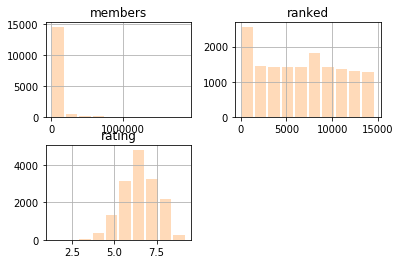

In [315]:
#Printing out animeDataGenre
plt.figure(figsize=(10,10))
animeDataGenre.hist(rwidth = 0.85, color = 'peachpuff');
print(animeDataGenre.columns)

print("\nNumber of single genres:",len(set(animeDataGenre.genre)))
print("\nList of single genres:\n",set(animeDataGenre.genre))


print("\nFinalized animeDataGenre:")
animeDataGenre

In [316]:
singleCounts

Counter({'military': 115,
         'action': 4215,
         'mystery': 215,
         'adventure': 1582,
         'sci-fi': 522,
         'drama': 905,
         'comedy': 3364,
         'slice of life': 976,
         'demons': 85,
         'game': 176,
         'music': 1318,
         'harem': 160,
         'kids': 1006,
         'fantasy': 588,
         'sports': 183,
         'historical': 261,
         'psychological': 49,
         'cars': 60,
         'school': 58,
         'ecchi': 148,
         'parody': 78,
         'romance': 158,
         'mecha': 88,
         'seinen': 11,
         'space': 38,
         'horror': 81,
         'shoujo': 8,
         'magic': 114,
         'shounen': 21,
         'supernatural': 56,
         'super power': 11,
         'dementia': 318,
         'thriller': 4,
         'police': 14,
         'hentai': 2212,
         'yaoi': 4,
         'josei': 6,
         'shounen ai': 2,
         'vampire': 3,
         'martial arts': 7,
         'samurai': 9})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

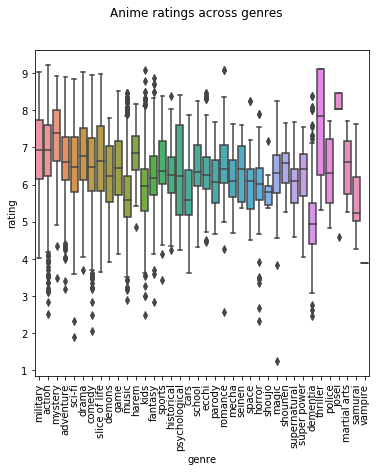

In [274]:
#plotting a box plot with 
#genre (x) and score (y) 
import seaborn as sns
plt.figure(figsize=(6,6))
plt.suptitle('Anime ratings across genres',fontsize=12)
sns.boxplot(x= animeDataGenre["genre"] , y=animeDataGenre["rating"])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

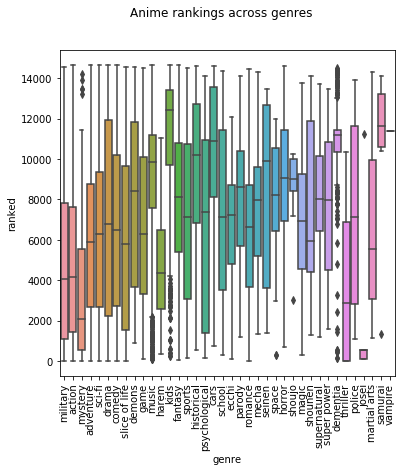

In [275]:
#plotting a box plot with 
#genre (x) and rating (y) 
import seaborn as sns
plt.figure(figsize=(6,6))
plt.suptitle('Anime rankings across genres',fontsize=12)
sns.boxplot(x= animeDataGenre["genre"], y=animeDataGenre["ranked"])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

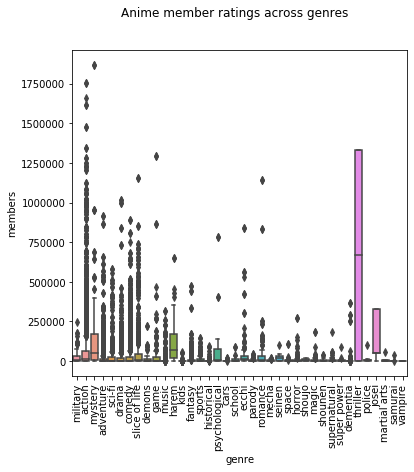

In [276]:
#plotting a box plot with 
#genre (x) and members (y) 
import seaborn as sns
plt.figure(figsize=(6,6))
plt.suptitle('Anime member ratings across genres',fontsize=12)
sns.boxplot(x= animeDataGenre["genre"], y=animeDataGenre["members"])
plt.xticks(rotation=90)

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.,
        14000., 16000.]), <a list of 10 Text xticklabel objects>)

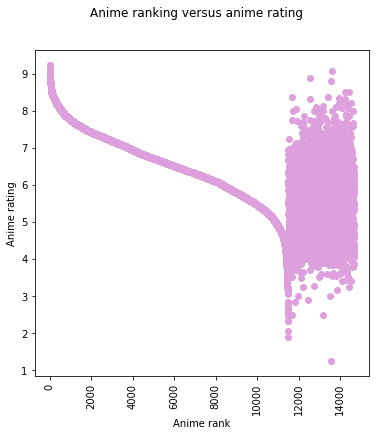

In [296]:
#plotting a box plot with 
#genre (x) and score (y) 
import seaborn as sns

plt.figure(figsize=(6,6))
plt.suptitle('Anime ranking versus anime rating',fontsize=12)
plt.xlabel('Anime rank')
plt.ylabel('Anime rating')
plt.scatter(x= animeDataGenre["ranked"], y=animeDataGenre["rating"], color = 'plum')
plt.xticks(rotation=90)

Final project report
https://www.overleaf.com/2389419276nytnsghvvdff


In [278]:
print(len(animeDataGenre["synopsis"]))

15460


want to be able to compare the average length of the synopses with each other across their first-genre categories

currently trying to convert animeDataGenre["synopsis"] into strings so we can calculate the length of each individual synopsis, then map the int of length with their respective genre category

if we go through the list, then we should be able to use a boxplot to help plot each of the lengths of the synopses so we can get a feel for the distribution and the mean of the synopses lengths for each genre category

In [257]:
synopsis = animeDataGenre.synopsis
np.asarray(synopsis)

array(["The year is Universal Century 0093. Char Aznable has taken command of Neo Zeon, the rebels of outer space. He firmly believes that humankind can only achieve peace by relocating to space. Thus, he plans to crash the giant asteroid Axis into Earth and plunge the planet into an uninhabitable winter. Char also eagerly anticipates this opportunity to settle a 14-year rivalry with Amuro Ray. The two have been reluctant allies at times, but Char has never forgiven Amuro for causing the death of one of his comrades during the One Year War. \r\n \r\nOnly the Earth Federation's Londo Bell Unit has the power to stop Char from fulfilling his dangerous goal. Leading the defense of Earth is veteran captain Bright Noa and Amuro Ray with the latest Nu Gundam mobile suit. In this thrilling conclusion to the original Gundam series, Londo Bell engages in a final conflict with Neo Zeon that will decide the fate of Earth and end this long-standing rivalry—once and for all. \r\n \r\n[Written by MAL

In [258]:
synopsis.to_string()

'0        The year is Universal Century 0093. Char Aznab...\n1        Inuyasha and company have finally destroyed Na...\n2        Years ago, all of the ghosts in a haunted scho...\n3        While visiting the National Library, junior-hi...\n4        Cocona is an average middle schooler living wi...\n5        Sentan Island is a small island surrounded by ...\n6        Saya Otonashi is a seemingly ordinary girl liv...\n7        Not much is notable about the lecherous Ataru ...\n8        On the floating continent of Neo Verona, the M...\n9        This OVA takes place in between episodes 8 and...\n10       Miyu is an 8th grade girl, whose parents have ...\n11       A.D. 2040—Thirty years have passed since the b...\n12                            Second season of Mitsudomoe.\n13       The "Anarchy Sisters," Panty and Stocking, hav...\n14       In the Sun Kingdom, sunshine is part of its ci...\n15       Due to his love for small, cute things, Souta ...\n16       Usagi Tsukino and her friends 

In [259]:
len(synopsis[0])

993

In [260]:
s = []
for i in synopsis:
    s.append(0,len(synopsis[i]))

KeyError: "The year is Universal Century 0093. Char Aznable has taken command of Neo Zeon, the rebels of outer space. He firmly believes that humankind can only achieve peace by relocating to space. Thus, he plans to crash the giant asteroid Axis into Earth and plunge the planet into an uninhabitable winter. Char also eagerly anticipates this opportunity to settle a 14-year rivalry with Amuro Ray. The two have been reluctant allies at times, but Char has never forgiven Amuro for causing the death of one of his comrades during the One Year War. \r\n \r\nOnly the Earth Federation's Londo Bell Unit has the power to stop Char from fulfilling his dangerous goal. Leading the defense of Earth is veteran captain Bright Noa and Amuro Ray with the latest Nu Gundam mobile suit. In this thrilling conclusion to the original Gundam series, Londo Bell engages in a final conflict with Neo Zeon that will decide the fate of Earth and end this long-standing rivalry—once and for all. \r\n \r\n[Written by MAL Rewrite]"

remember to rename this file to jchun_final_project
email this code to whomever will be sending the project file

also look up mapping to try to make a chart with genre vs synopsis length

need to make my stuff much more asctetic or it will stand out too much compared to Jessica's stuff